In [2]:
from src.model.shap.analyze_shap_results import analyze_shap_results
from src.model.shap.run_shap import run_shap
target_col = "mmse"
model = "RandomForestRegressor"
timestamp = "2025-09-14_1008"
save_filename = "shap_summary_regression.png"
dataset_name = "demographic+digital"

shap_explanations = run_shap(
    dataset_name=dataset_name,
    target_col=target_col,
    task="regression",
    model_name_to_explain=model,
    timestamp=timestamp
)

[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers.

In [3]:
shap_explanations[0].values.shape

(1, 20)

In [3]:
from src.model.shap.analyze_shap_results import analyze_shap_results
shap_df = analyze_shap_results(explanations=shap_explanations)
shap_df

,mean_abs_shap,freq_selection
is_valid_sum_A,0.066690,0.094595
max_duration_B_A_ratio,0.042511,0.027027
non_cut_correct_targets_touches_PART_B,0.041989,1.000000
is_valid_sum_B,0.039102,1.000000
non_cut_correct_targets_touches_B_A_ratio,0.032490,1.000000
total_hesitations_PART_A,0.031786,0.013514
travel_time_PART_B,0.028810,0.013514
travel_distance_B_A_ratio,0.027771,0.054054
state_transitions_PART_A,0.027331,0.027027
average_duration_PART_A,0.023390,0.027027


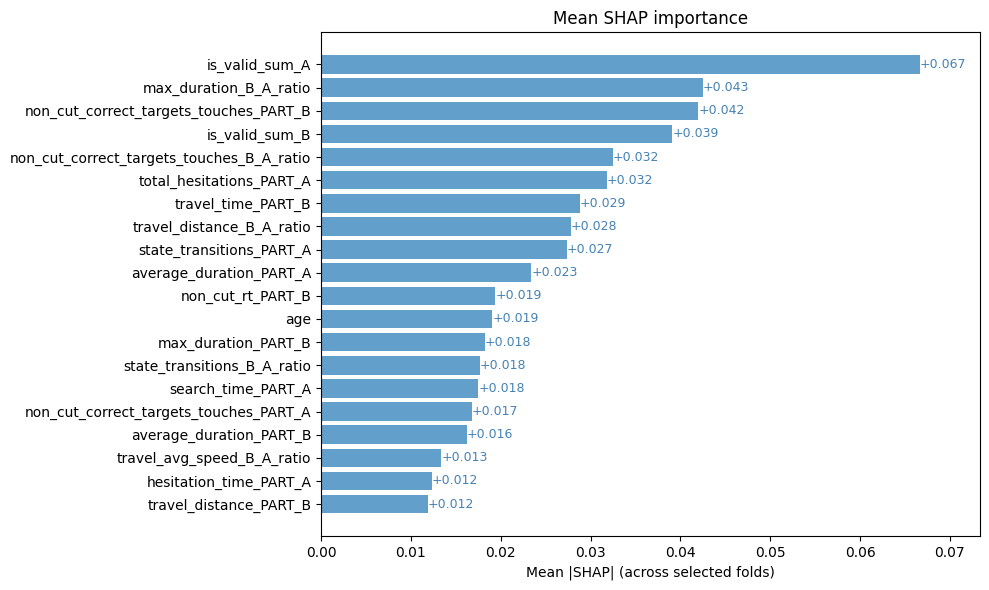

In [4]:
from src.model.shap.analyze_shap_results import plot_shap_summary
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def plot_shap_summary(df, top_n=20, plot_freq=False, annotate_values=True):
    """
    Plot SHAP summary in horizontal format.

    Args:
        df: DataFrame with columns ['mean_abs_shap', 'freq_selection'].
        top_n: number of features to display (ordered by mean_abs_shap).
        plot_freq: if True, add selection frequency on a secondary X axis.
        annotate_values: if True, annotate each bar with its mean SHAP value.
    """
    # Sort by mean absolute SHAP value and keep the top_n features
    df_plot = df.sort_values("mean_abs_shap", ascending=True).tail(top_n)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Axis 1: horizontal bars of mean absolute SHAP values
    bar_color = "steelblue"
    bars = ax1.barh(df_plot.index, df_plot["mean_abs_shap"], alpha=0.7)
    ax1.set_xlabel("Mean |SHAP| (across selected folds)")
    ax1.tick_params(axis="x")

    # Add text annotations at the end of each bar
    if annotate_values:
        max_val = df_plot["mean_abs_shap"].max()
        for bar in bars:
            width = bar.get_width()
            ax1.text(width,
                     bar.get_y() + bar.get_height()/2,
                     f"+{width:.3f}",
                     va="center", ha="left", fontsize=9, color=bar_color)
        # Extend x-axis limit to avoid cutting off text
        ax1.set_xlim(0, max_val * 1.1)

    # Optional Axis 2: selection frequency
    if plot_freq:
        ax2 = ax1.twiny()
        ax2.plot(df_plot["freq_selection"], df_plot.index, color="darkorange",
                 marker="o", linestyle="-", linewidth=2)
        ax2.set_xlabel("Selection frequency", color="darkorange")
        ax2.tick_params(axis="x", labelcolor="darkorange")
        ax2.set_xlim(0, 1)

    plt.title("Mean SHAP importance" +
              (" and selection frequency" if plot_freq else ""))
    plt.tight_layout()
    plt.show()



plot_shap_summary(shap_df)